# How To Work With Structures

In [1]:
from pathlib import Path

from qcio import Structure, view, ProgramOutput, align
from qcio.constants import HARTREE_TO_KCAL_PER_MOL

In [2]:
# Constants
DATA_DIR = Path("../data")
STRUCT_DIR = DATA_DIR / "structures"
CALC_DIR = DATA_DIR / "calcs"

## Create A New Structure from SMILES

In [3]:
u2_anion = Structure.from_smiles(r"[O-]/C(=N\c1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc2cccc(C(F)(F)F)c2")
u3_anion = Structure.from_smiles(r"[O-]/C(=N\c1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc2ccccc2")

In [4]:
# See charge/multiplicity
print(u2_anion.charge)

-1


### Use `openbabel` for Multi-Structure SMILES

In [5]:
u2_rc = Structure.from_smiles(
    r"[O-]/C(=N\c1cc(C(F)(F)F)cc(C(F)(F)F)c1)Nc2cccc(C(F)(F)F)c2.C[C@@H]1OC(=O)[C@H](C)OC1=O.CO",
    program='openbabel'
)

## Add Identifier Information

In [8]:
u2_anion.add_identifiers(name="U2 Anion")
u3_anion.add_identifiers(name="U3 Anion")
u2_rc.add_identifiers(name="U2 Reaction Complex")


In [9]:
# Pass one or more qcio object(s) such as Structures or ProgramOutput results to view.view for a visualization
view.view(u2_anion, u3_anion, u2_rc)

## Add Custom Titles/Subtitles

In [10]:
view.view(
    u2_anion, u3_anion, 
    titles=["U2 Anion (Custom!)", "U3 Anion (Custom!)"], 
    subtitles=["More Fluorines 🧪", "Fewer Fluorines 🧪"]
)

In [13]:
view.view(u2_rc, show_indices=True)

## Measure Distances

In [17]:
view.view(u2_rc, distances=[(39, 36), (58, 43)], length_unit="angstrom")

## Overlay Structures
Not that useful for two different structures, but helpful when analyzing conformers.

In [18]:
view.view(u2_anion, u3_anion, same_viewer=True)

## View in 2D


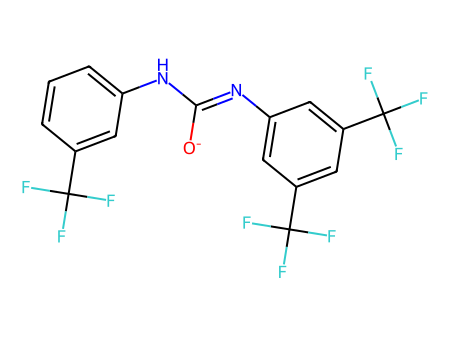
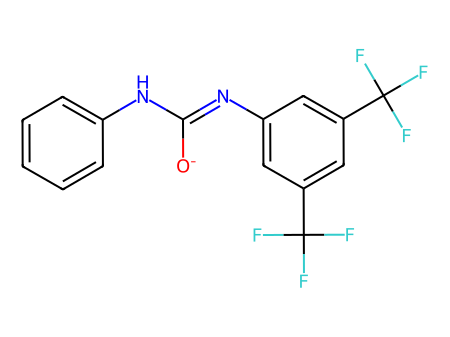

In [19]:
view.view(u2_anion, u3_anion, view_2d=True)

## Save Structures to Disk
Structures may be saved as `.json`, `.xyz`, `.yaml` or `.toml` files.

In [20]:
u2_anion.save(STRUCT_DIR / "u2-anion.json")
u3_anion.save(STRUCT_DIR / "u3-anion.json")
u2_rc.save(STRUCT_DIR / "u2-rc.json")

## Reopen Structures
Structures can be reopened anytime for later analysis

In [21]:
u2_reopened = Structure.open(STRUCT_DIR / "u2-anion.json")
view.view(u2_reopened)